## Analysis 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from scipy import stats
import datetime

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
#d.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
# Create a new column called gender_mapped that maps 'Male' to '0'
# and 'Female' to '1' 
df["gender_mapped"] = df["Gender"].map({"Male": "0", "Female": "1"}).astype(int)
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   gender_mapped    400 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 17.3+ KB


User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
gender_mapped       int32
dtype: object

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

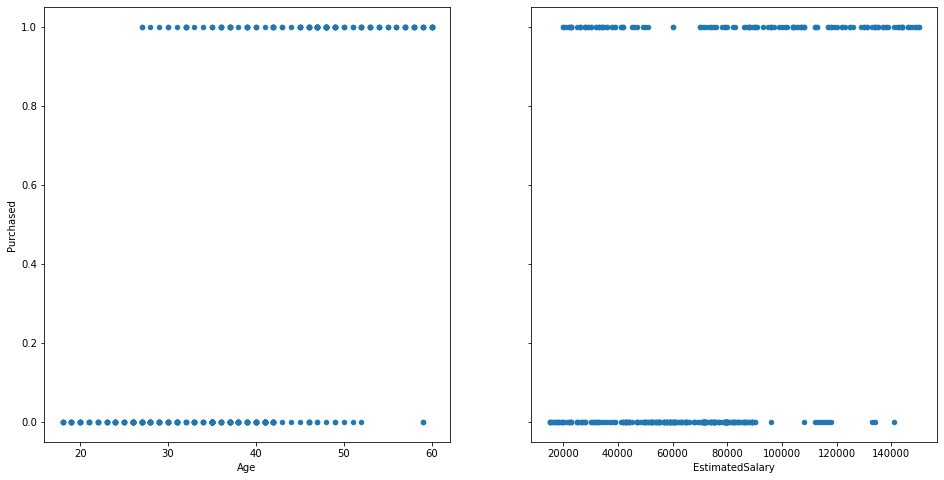

In [8]:
# visualize the relationship between the Purchase and variables using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='Age', y='Purchased', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='EstimatedSalary', y='Purchased', ax=axs[1])

In [9]:
#Standardize the "Age" and "EstimatedSalary" columns
df.Age = (df.Age - df.Age.mean()) / df.Age.std()
df.EstimatedSalary = (df.EstimatedSalary - df.EstimatedSalary.mean()) / df.EstimatedSalary.std()
df

,User ID,Gender,Age,EstimatedSalary,Purchased,gender_mapped
0,15624510,Male,-1.779569,-1.488183,0,0
1,15810944,Male,-0.253270,-1.458854,0,0
2,15668575,Female,-1.111813,-0.784307,0,1
3,15603246,Female,-1.016419,-0.373714,0,1
4,15804002,Male,-1.779569,0.183521,0,0
...,...,...,...,...,...,...
395,15691863,Female,0.796060,-0.842964,1,1
396,15706071,Male,1.273028,-1.370870,1,0
397,15654296,Female,1.177635,-1.458854,1,1
398,15755018,Male,-0.157877,-1.077589,0,0


### Logistic Regression

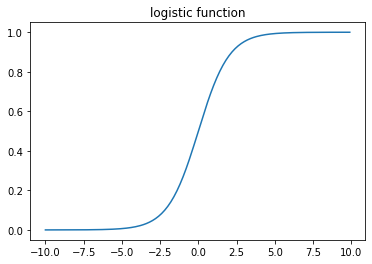

In [10]:
#logestic function
import math

def logistic(x):
    return 1.0 / (1 + math.exp(-x))
#     return 1.0 / (1 + np.exp(-x))

x = [x_/10 for x_ in range(-100,100)]
y = [logistic(x_) for x_ in x]
plt.plot(x, y);
plt.title('logistic function');

In [11]:
from sklearn.linear_model import LogisticRegression

X = df[['Age', 'EstimatedSalary', 'gender_mapped']]
y = df.Purchased


lm = LogisticRegression(class_weight={0:0.4, 1:0.6})
lm.fit(X, y)
display('number of not purchased=',len(y[y==0]))
display('number of purchased=',len(y[y==1]))
len(y[y==0])/(len(y[y==0])+len(y[y==1]))

print('intercept is',lm.intercept_)
print('Coeificients are=',lm.coef_)

display(X)
display(y)

'number of not purchased='

257

'number of purchased='

143

intercept is [-0.57991341]
Coeificients are= [[ 2.23347889  1.12897249 -0.22747677]]


,Age,EstimatedSalary,gender_mapped
0,-1.779569,-1.488183,0
1,-0.253270,-1.458854,0
2,-1.111813,-0.784307,1
3,-1.016419,-0.373714,1
4,-1.779569,0.183521,0
...,...,...,...
395,0.796060,-0.842964,1
396,1.273028,-1.370870,0
397,1.177635,-1.458854,1
398,-0.157877,-1.077589,0


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64